In [4]:
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')


# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns



# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 3 decimal places     
pd.options.display.float_format = '{:.3f}'.format

**Import Dataset**

In [3]:
forest_fire=pd.read_csv("ForestFireBrazil.csv", parse_dates=["date"])

**1. Display Top 5 Rows of The Dataset**

In [56]:
forest_fire.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.000,1998-01-01
1,1999,Acre,Janeiro,0.000,1999-01-01
2,2000,Acre,Janeiro,0.000,2000-01-01
3,2001,Acre,Janeiro,0.000,2001-01-01
4,2002,Acre,Janeiro,0.000,2002-01-01


**2. Check Last 5 Rows**

In [57]:
forest_fire.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.000,2012-01-01
6450,2013,Tocantins,Dezembro,85.000,2013-01-01
6451,2014,Tocantins,Dezembro,223.000,2014-01-01
6452,2015,Tocantins,Dezembro,373.000,2015-01-01
6453,2016,Tocantins,Dezembro,119.000,2016-01-01


**3. Find Shape of Our Dataset (Number of Rows And Number of Columns)**

In [58]:
forest_fire.shape

(6454, 5)

**4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement**

In [59]:
forest_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


**5. Check For Duplicate Data and Drop Them**

In [60]:
forest_fire.duplicated().sum()

32

In [61]:
forest_fire.drop_duplicates(inplace=True)

**6. Check Null Values In The Dataset**

In [62]:
forest_fire.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

**7. Get Overall Statistics About The Dataframe**

In [63]:
forest_fire.describe(include="all").T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
year,6422.000,NaN,NaN,NaN,NaT,NaT,2007.491,5.732,1998.000,2003.000,2007.000,2012.000,2017.000
state,6422,23,Rio,697,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,6422,12,Agosto,540,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,6422.000,NaN,NaN,NaN,NaT,NaT,108.815,191.142,0.000,3.000,24.497,114.000,998.000
date,6422,20,2015-01-01 00:00:00,324,1998-01-01,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**8. Rename Month Names To English**

In [64]:
forest_fire.month.value_counts()

Agosto       540
Setembro     540
Outubro      540
Novembro     540
Junho        539
Julho        539
Janeiro      535
Fevereiro    535
Março        534
Abril        534
Maio         533
Dezembro     513
Name: month, dtype: int64

In [65]:
month_dict={"Janeiro":"January", "Fevereiro":"February", "Março": "March","Abril" : "April", 
            "Maio":"May" , "Dezembro":"December", "Agosto": "August", "Setembro":"September", "Novembro" :"November" 
           ,"Junho": "June",  "Julho": "July", "Outubro":"October"}

In [66]:
forest_fire.month.replace(month_dict, inplace=True)

In [67]:
forest_fire.month.value_counts()

August       540
September    540
October      540
November     540
June         539
July         539
January      535
February     535
March        534
April        534
May          533
December     513
Name: month, dtype: int64

**9. Total Number of Fires Registered**

In [68]:
len(forest_fire)

6422

In [69]:
forest_fire.number.sum()

698811.073

-  There are total 698811.073  registered.

**10. In Which Month Maximum Number of Forest Fires Were Reported?**

In [70]:
fire_reg_month=forest_fire.groupby(by="month").sum().round()["number"]
fire_reg_month

month
April       28185.000
August      88050.000
December    57535.000
February    30839.000
January     47682.000
July        92319.000
June        55998.000
March       30709.000
May         34725.000
November    85508.000
October     88682.000
September   58578.000
Name: number, dtype: float64

In [71]:
fire_reg_month.sort_values( ascending=False)

month
July        92319.000
October     88682.000
August      88050.000
November    85508.000
September   58578.000
December    57535.000
June        55998.000
January     47682.000
May         34725.000
February    30839.000
March       30709.000
April       28185.000
Name: number, dtype: float64

- The July month has maximum number of fire registered.

In [72]:
forest_fire.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

**11. In Which Year Maximum Number of Forest Fires Was Reported?**

In [73]:
fire_reg_year=forest_fire.groupby(by="year").sum().round()["number"]
fire_reg_year

year
1998   20014.000
1999   26883.000
2000   27351.000
2001   29055.000
2002   37391.000
2003   42761.000
2004   38450.000
2005   35005.000
2006   33824.000
2007   33028.000
2008   29379.000
2009   39116.000
2010   37037.000
2011   34634.000
2012   40085.000
2013   35137.000
2014   39621.000
2015   41208.000
2016   42212.000
2017   36620.000
Name: number, dtype: float64

In [74]:
fire_reg_year.sort_values(ascending=False)

year
2003   42761.000
2016   42212.000
2015   41208.000
2012   40085.000
2014   39621.000
2009   39116.000
2004   38450.000
2002   37391.000
2010   37037.000
2017   36620.000
2013   35137.000
2005   35005.000
2011   34634.000
2006   33824.000
2007   33028.000
2008   29379.000
2001   29055.000
2000   27351.000
1999   26883.000
1998   20014.000
Name: number, dtype: float64

- The year 2003 has maximum number of fire case registered.

**12. In Which State Maximum Number of Forest Fires Was Reported?**

In [75]:
fire_reg_state=forest_fire.groupby(by="state").sum().round()["number"]
fire_reg_state

state
Acre               18464.000
Alagoas             4606.000
Amapa              21832.000
Amazonas           30650.000
Bahia              44746.000
Ceara              30428.000
Distrito Federal    3561.000
Espirito Santo      6546.000
Goias              37696.000
Maranhao           25129.000
Mato Grosso        96246.000
Minas Gerais       37475.000
Paraiba            52427.000
Pará               24512.000
Pernambuco         24498.000
Piau               37804.000
Rio                45095.000
Rondonia           20285.000
Roraima            24385.000
Santa Catarina     24360.000
Sao Paulo          51121.000
Sergipe             3237.000
Tocantins          33708.000
Name: number, dtype: float64

In [76]:
fire_reg_state.sort_values(ascending=False)

state
Mato Grosso        96246.000
Paraiba            52427.000
Sao Paulo          51121.000
Rio                45095.000
Bahia              44746.000
Piau               37804.000
Goias              37696.000
Minas Gerais       37475.000
Tocantins          33708.000
Amazonas           30650.000
Ceara              30428.000
Maranhao           25129.000
Pará               24512.000
Pernambuco         24498.000
Roraima            24385.000
Santa Catarina     24360.000
Amapa              21832.000
Rondonia           20285.000
Acre               18464.000
Espirito Santo      6546.000
Alagoas             4606.000
Distrito Federal    3561.000
Sergipe             3237.000
Name: number, dtype: float64

- The state Mato Grosso has maximum number of fire registered.

**13. Find Total Number of Fires Were Reported In Amazonas**

In [77]:
fire_reg_state[fire_reg_state.keys()=="Amazonas"]

state
Amazonas   30650.000
Name: number, dtype: float64

- There are 30650 fire case are registered in Amazonas.

**14. Display Number of Fires Were Reported In Amazonas (Year-Wise)**

In [78]:
forest_fire[forest_fire.state=="Amazonas"].groupby(by="year").sum()

,number
year,
1998,946.000
1999,1061.000
2000,853.000
2001,1297.000
2002,2852.000
2003,1524.268
2004,2298.207
2005,1657.128
2006,997.640


**15. Display Number of Fires Were Reported In Amazonas (Day-Wise)**

In [79]:
forest_fire.head()

,year,state,month,number,date
0,1998,Acre,January,0.000,1998-01-01
1,1999,Acre,January,0.000,1999-01-01
2,2000,Acre,January,0.000,2000-01-01
3,2001,Acre,January,0.000,2001-01-01
4,2002,Acre,January,0.000,2002-01-01


In [80]:
import datetime

In [84]:
forest_fire['date']=pd.to_datetime(forest_fire["date"])

In [86]:
forest_fire["day"]=forest_fire['date'].dt.day_name()

In [87]:
forest_fire.head()

,year,state,month,number,date,day
0,1998,Acre,January,0.000,1998-01-01,Thursday
1,1999,Acre,January,0.000,1999-01-01,Friday
2,2000,Acre,January,0.000,2000-01-01,Saturday
3,2001,Acre,January,0.000,2001-01-01,Monday
4,2002,Acre,January,0.000,2002-01-01,Tuesday


In [90]:
forest_fire[forest_fire.state=="Amazonas"].groupby(by="day").sum()

,year,number
day,,
Friday,72300,5446.480
Monday,48096,1886.601
Saturday,72192,4162.666
Sunday,70403,3015.186
Thursday,96312,5754.802
Tuesday,72276,6474.217
Wednesday,48204,3910.177


**16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’**

<AxesSubplot:xlabel='month'>

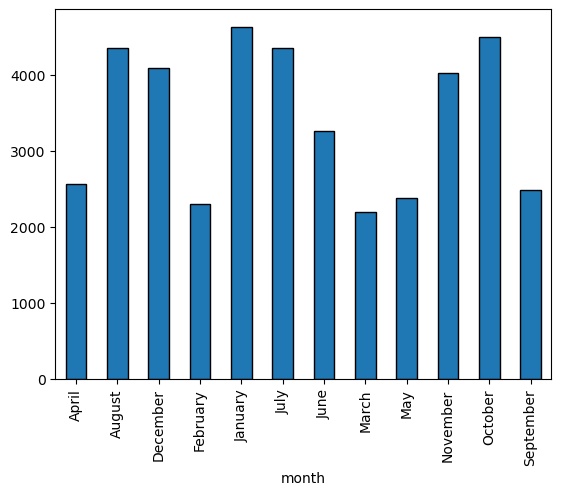

In [102]:
forest_fire[forest_fire['year']==2015].groupby(by="month").sum()["number"].plot(kind="bar", edgecolor="black")

**17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)**

In [106]:
forest_fire.groupby(by="state").mean().sort_values(by="number", ascending=False)['number'].to_frame()

,number
state,
Sao Paulo,213.896
Mato Grosso,203.480
Bahia,187.223
Piau,158.175
Goias,157.722
Minas Gerais,156.800
Tocantins,141.037
Amazonas,128.243
Ceara,127.314


In [107]:
forest_fire.month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

**18. To Find The State Names Where Fires Were Reported In 'dec' Month**

In [110]:
forest_fire[forest_fire['month']== 'December']["state"].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)